# Info
Purpose:

    To load a few different maps of the models used for ARCSIX MSS
    Ensure that pre and post regridding show the same data

Input:

    arguments

Output:

    Figures

Keywords:

    none

Dependencies:

    - load_utils.py
    - matplotlib
    - numpy

Needed Files:
  - file.rc : for consistent creation of look of matplotlib figures
  - ...

Modification History:
    
    Written: Samuel LeBlanc, Santa Cruz, CA, 2023-11-17
    Modified:


# Prepare python environment

In [2]:
import numpy as np
import netCDF4 as nc
import load_utils as lu
import write_utils as wu
from path_utils import getpath
import hdf5storage as hs
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib notebook
import os

In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [4]:
vv = 'v1'
fp = '/data2/mss/rasmdata/'
name = 'ARCSIX_MSS'

# Load files

## Load OG ARCSIX - RASM-ESRL

In [5]:
os.listdir(fp+'old/')

['RASM-ESRL_2023-11-15-00_t120.nc',
 'old',
 'RASM-ESRL_2023-11-15-00_t144.nc',
 'RASM-ESRL_2023-11-15-00_t168.nc',
 'RASM-ESRL_2023-11-15-00_t240.nc',
 'RASM-ESRL_2023-11-15-00_t024.nc',
 'RASM-ESRL_2023-11-16-00_t096.nc',
 'ARCSIX_2023-11-16.nc',
 'RASM-ESRL_2023-11-16-00_t192.nc',
 'RASM-ESRL_2023-11-16-00_t120.nc',
 'RASM-ESRL_2023-11-15-00_t048.nc',
 'RASM-ESRL_2023-11-16-00_t072.nc',
 'RASM-ESRL_2023-11-16-00_t240.nc',
 'RASM-ESRL_2023-11-15-00_t072.nc',
 'RASM-ESRL_2023-11-16-00_t024.nc',
 'RASM-ESRL_2023-11-16-00_t216.nc',
 'RASM-ESRL_2023-11-15-00_t216.nc',
 'RASM-ESRL_2023-11-15-00_t192.nc',
 'RASM-ESRL_2023-11-15-00_t096.nc',
 'ARCSIX_2023-11-15.nc',
 'RASM-ESRL_2023-11-16-00_t168.nc',
 'RASM-ESRL_2023-11-16-00_t048.nc',
 'RASM-ESRL_2023-11-16-00_t144.nc']

In [6]:
f_og = fp+'old/ARCSIX_2023-11-15.nc'

In [7]:
og,og_dict = lu.load_netcdf(f_og,everything=True)

Reading file: /data2/mss/rasmdata/old/ARCSIX_2023-11-15.nc
Outputting the Data subdatasets:
0: alat
1: alon
2: time
3: lwp
4: iwp
5: lwd
6: lat_grid
7: lon_grid
8: lwp_regrid
9: iwp_regrid
[b'alat', b'alon', b'time', b'lwp', b'iwp', b'lwd', b'lat_grid', b'lon_grid', b'lwp_regrid', b'iwp_regrid']


## Load regridded ARCSIX  - RASM-ESRL

In [8]:
os.listdir(fp)

['RASM_ESRL_ml.json',
 'RASM_ESRL_sfc.from4NIC_2023-11-15-00_t216.nc',
 'old',
 'RASM_ESRL_sfc.from4NIC_2023-11-15-00_t096.nc',
 'RASM_ESRL_sfc.from4NIC_2023-11-16-00_t024.nc',
 'RASM_ESRL_sfc.from4NIC_2023-11-16-00_t168.nc',
 'RASM_ESRL_sfc.from4NIC_2023-11-16-00_t072.nc',
 'RASM_ESRL_ml.fromARCSIX_2023-11-16.nc',
 'RASM_ESRL_sfc.from4NIC_2023-11-15-00_t024.nc',
 '.get_RASM.sh.swp',
 'RASM_ESRL_sfc.from4NIC_2023-11-16-00_t192.nc',
 'RASM_ESRL_sfc.from4NIC_2023-11-15-00_t192.nc',
 'RASM_ESRL_sfc.from4NIC_2023-11-15-00_t120.nc',
 'RASM_ESRL_ml.fromARCSIX_2023-11-15.nc',
 'RASM_ESRL_sfc.from4NIC_2023-11-15-00_t048.nc',
 'RASM_ESRL_sfc.from4NIC_2023-11-15-00_t168.nc',
 'get_RASM.sh',
 'RASM_ESRL_sfc.from4NIC_2023-11-16-00_t144.nc',
 'RASM_ESRL_sfc.from4NIC_2023-11-16-00_t096.nc',
 'RASM_ESRL_sfc.from4NIC_2023-11-16-00_t048.nc',
 'RASM_ESRL_sfc.from4NIC_2023-11-15-00_t144.nc',
 'RASM_ESRL_sfc.json',
 'RASM_ESRL_sfc.from4NIC_2023-11-15-00_t072.nc',
 'RASM_ESRL_sfc.from4NIC_2023-11-16-00_t12

In [9]:
f_re = fp+'RASM_ESRL_ml.fromARCSIX_2023-11-15.nc'

In [10]:
re,re_dict = lu.load_netcdf(f_re,everything=True)

Reading file: /data2/mss/rasmdata/RASM_ESRL_ml.fromARCSIX_2023-11-15.nc
Outputting the Data subdatasets:
0: time
1: lat_grid
2: lon_grid
3: lwp
4: iwp
[b'time', b'lat_grid', b'lon_grid', b'lwp', b'iwp']


# Plot the different maps

## Load map defaults

In [11]:
def make_map(lower_left=[-100,72],upper_right=[20,73]):
    proj = ccrs.NorthPolarStereo()
    m = plt.figure()
    ax = m.add_subplot(111, projection=proj)
    ax.plot([0],[0])
    ax.coastlines()
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',edgecolor='k',
                                            facecolor=cfeature.COLORS['land']+0.0625)
    provinces_50m = cfeature.NaturalEarthFeature('cultural','admin_1_states_provinces_lines','50m',facecolor='none')
    ax.gridlines(draw_labels=True,auto_update=True)
    ax.add_feature(land_50m,alpha=0.1)
    ax.add_feature(cfeature.LAKES, facecolor=[0.69375   , 0.81484375, 0.9828125 ],alpha=0.3)
    ax.add_feature(cfeature.RIVERS,alpha=0.2)
    ax.add_feature(provinces_50m)
    ax.add_feature(cfeature.BORDERS)

    ax.set_extent([lower_left[0], upper_right[0],lower_left[1],upper_right[1]])
    return m,ax

<IPython.core.display.Javascript object>


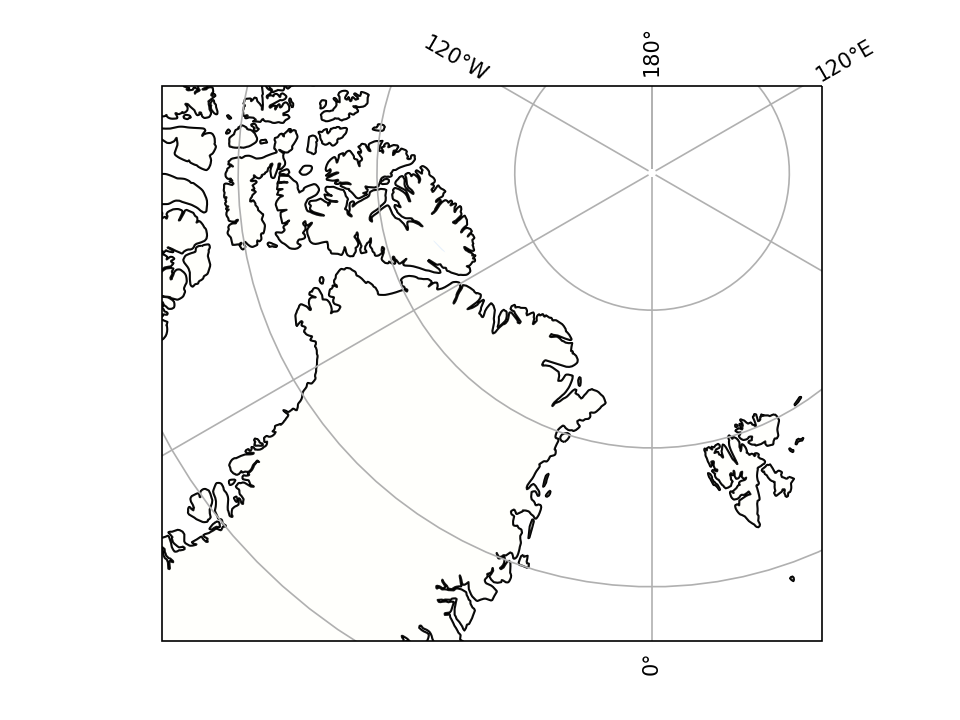

In [12]:
fig,ax = make_map()
fig.show()

## plots maps

In [13]:
og.keys()

dict_keys([b'alat', b'alon', b'time', b'lwp', b'iwp', b'lwd', b'lat_grid', b'lon_grid', b'lwp_regrid', b'iwp_regrid'])

In [14]:
tr = ccrs.PlateCarree()

<IPython.core.display.Javascript object>


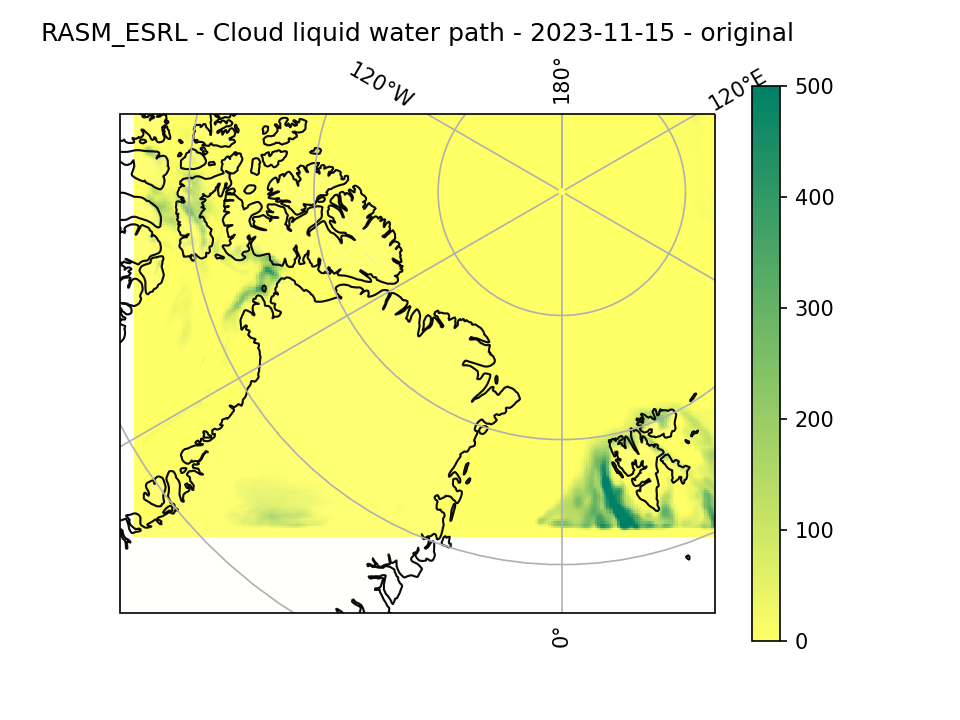

In [15]:
fig,ax = make_map()
cf = ax.pcolormesh(og[b'alon'],og[b'alat'],og[b'lwp'][0,:,:],cmap=plt.cm.summer_r,transform=tr,vmin=0,vmax=500)
plt.title('RASM_ESRL - Cloud liquid water path - 2023-11-15 - original')
plt.colorbar(cf)

In [16]:
ilat1, ilon1 = 78.0,13.0
ilat2, ilon2 = 80.0,30.0

In [17]:
iarg1 = np.argmin((og[b'alon']-ilon1)**2+(og[b'alat']-ilat1)**2)
iarg2 = np.argmin((og[b'alon']-ilon2)**2+(og[b'alat']-ilat2)**2)
og[b'lwp'][0,:,:].flatten()[iarg1],og[b'lwp'][0,:,:].flatten()[iarg2]

(0.0, 27.216024)

In [18]:
iarg1,iarg2

(156833, 143368)

In [19]:
og[b'lwp'][0,:,:].flatten()[iarg1],og[b'lwp'][0,:,:].flatten()[iarg2]

(0.0, 27.216024)

<IPython.core.display.Javascript object>


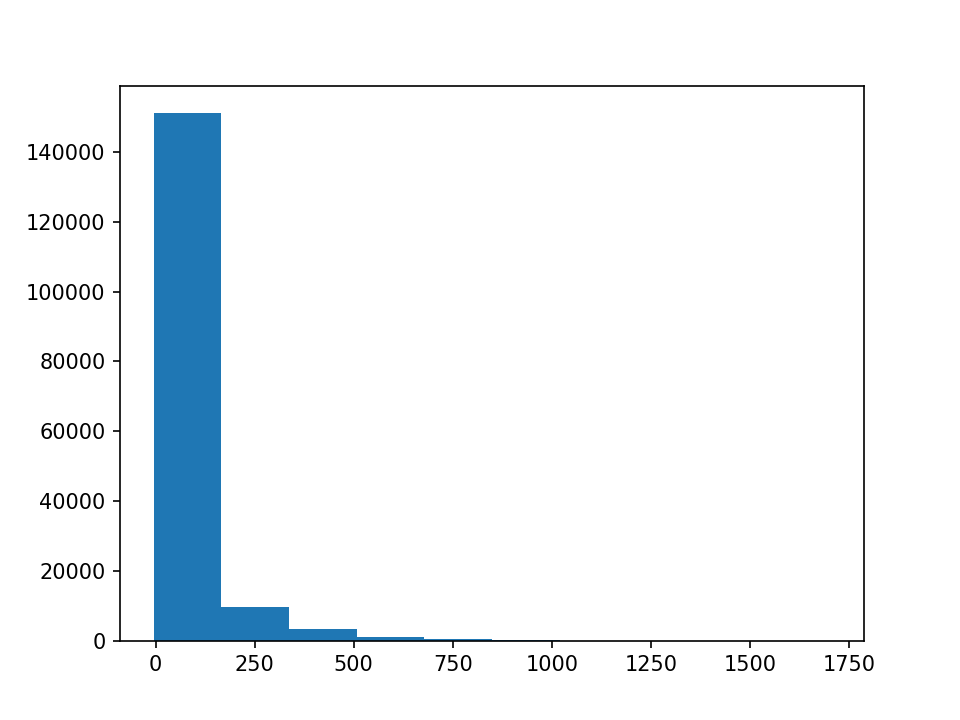

(array([1.51171e+05, 9.67800e+03, 3.35300e+03, 1.11800e+03, 3.74000e+02,
        1.36000e+02, 3.90000e+01, 1.20000e+01, 4.00000e+00, 3.00000e+00]),
 array([  -4.43087339,  166.24261475,  336.91610718,  507.58956909,
         678.26306152,  848.93652344, 1019.61004639, 1190.28344727,
        1360.95703125, 1531.63049316, 1702.30395508]),
 <BarContainer object of 10 artists>)

In [20]:
plt.figure()
plt.hist(og[b'lwp'][0,:,:].flatten())

<IPython.core.display.Javascript object>


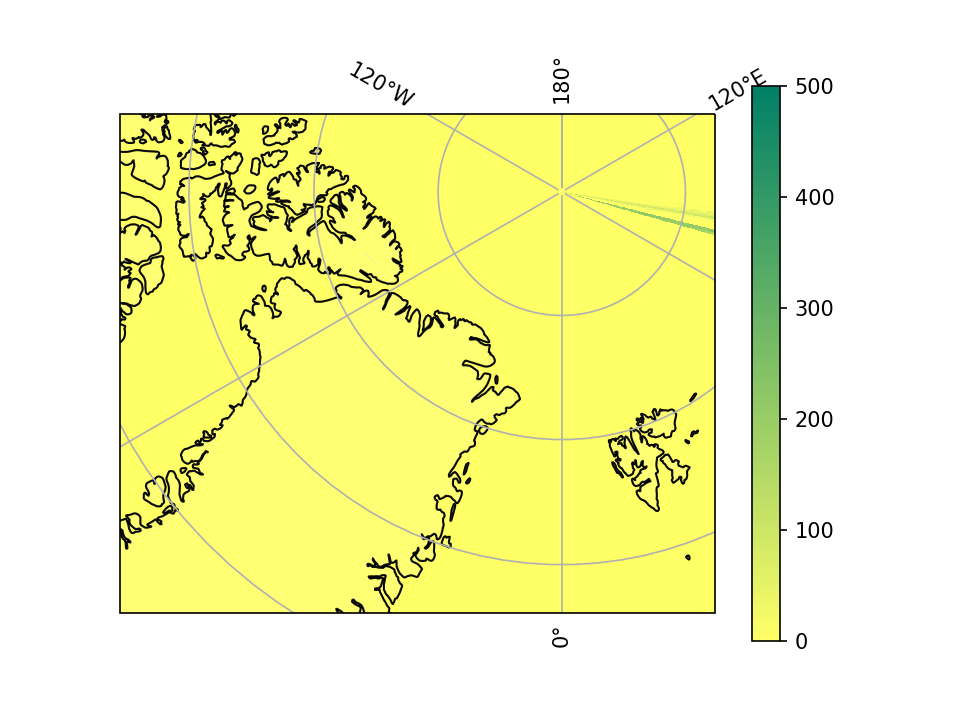

In [21]:
fig,ax = make_map()
cf = ax.pcolormesh(re[b'lon_grid'],re[b'lat_grid'],re[b'lwp'][0,:,:],cmap=plt.cm.summer_r,transform=tr,vmin=0,vmax=500)
plt.colorbar(cf)

In [24]:
xx,yy = np.meshgrid(re[b'lon_grid'],re[b'lat_grid'])

In [25]:
iarg1 = np.argmin((xx-ilon1)**2+(yy-ilat1)**2)
iarg2 = np.argmin((xx-ilon2)**2+(yy-ilat2)**2)
re[b'lwp'][0,:,:].flatten()[iarg1],re[b'lwp'][0,:,:].flatten()[iarg2]

(0.063939, 0.0)

# Make the lat lon regrid by hand to check status

In [20]:
import scipy.interpolate as interp

In [21]:
def regrid_latlon(data_file,lon_name='lon',lat_name='lat',named_variables=['sic_merged'],debug=False):
    'Regrid the latitude and longitude 2d matrices into a 1d lat/lon in regular grids'
    import netCDF4 as nc
    import numpy as np
    import scipy.interpolate as interp
    import datetime
    
    vars = {}
    vars_dict = {}
    
    with nc.Dataset(data_file,'a',clobber=False) as file:
        lon_var = file[lon_name][:]
        lat_var = file[lat_name][:]
        time_var = file['time'][:]
        for n in named_variables:
            vars[n] = file[n][:]
            vars_dict[n] = file.variables[n]
        
        new_lon = np.linspace(start=np.nanmin(lon_var),stop=np.nanmax(lon_var),num=lon_var.shape[1])
        new_lat = np.linspace(start=np.nanmin(lat_var),stop=np.nanmax(lat_var),num=lat_var.shape[0])
        xm,ym = np.meshgrid(new_lon,new_lat)
        
        #build the new vars space
        new_vars = {}
        for n in named_variables:
            if len(vars[n].shape) > 2:
                print(f"...regridding file '{data_file}' variable: '{n}'")
                new_vars[n] = np.zeros_like(vars[n])
                vars[n].mask = ~np.isfinite(vars[n])
                for it,t in enumerate(time_var):
                    xmask,ymask = np.where(~vars[n][it,:,:].mask)
                    try:
                        new_vars[n][it,:,:] = interp.griddata((lat_var[xmask,ymask].flatten(),lon_var[xmask,ymask].flatten()),vars[n][it,xmask,ymask].flatten(),(xm,ym),'nearest')
                    except Exception as e:
                        if debug: import ipdb; ipdb.set_trace()
                        print(f"Error gridding variable '{n}': {str(e)}")

In [32]:
lon_var = og[b'alon'][:]
lat_var = og[b'alat'][:]

In [33]:
new_lon = np.linspace(start=np.nanmin(lon_var),stop=np.nanmax(lon_var),num=lon_var.shape[1])
new_lat = np.linspace(start=np.nanmin(lat_var),stop=np.nanmax(lat_var),num=lat_var.shape[0])
xm,ym = np.meshgrid(new_lon,new_lat)

In [22]:
vars = {}
new_vars = {}

In [23]:
vars['lwp'] = og[b'lwp'][:]

In [32]:
plt.figure()
plt.hist(vars[n][0,:,:].flatten())

<IPython.core.display.Javascript object>

(array([1.51171e+05, 9.67800e+03, 3.35300e+03, 1.11800e+03, 3.74000e+02,
        1.36000e+02, 3.90000e+01, 1.20000e+01, 4.00000e+00, 3.00000e+00]),
 array([  -4.43087339,  166.24261475,  336.91610718,  507.58956909,
         678.26306152,  848.93652344, 1019.61004639, 1190.28344727,
        1360.95703125, 1531.63049316, 1702.30395508]),
 <BarContainer object of 10 artists>)

In [24]:
n = 'lwp'

In [25]:
new_vars[n] = np.zeros_like(vars[n])

In [26]:
vars[n].mask = ~np.isfinite(vars[n])

In [27]:
it = 0

In [29]:
xmask,ymask = np.where(~vars[n][it,:,:].mask)

In [83]:
new_vars[n][it,:,:] = interp.griddata((lat_var[xmask,ymask].flatten(),\
                                       lon_var[xmask,ymask].flatten()),\
                                      vars[n][it,xmask,ymask].flatten(),(xm,ym), method='cubic')

<IPython.core.display.Javascript object>


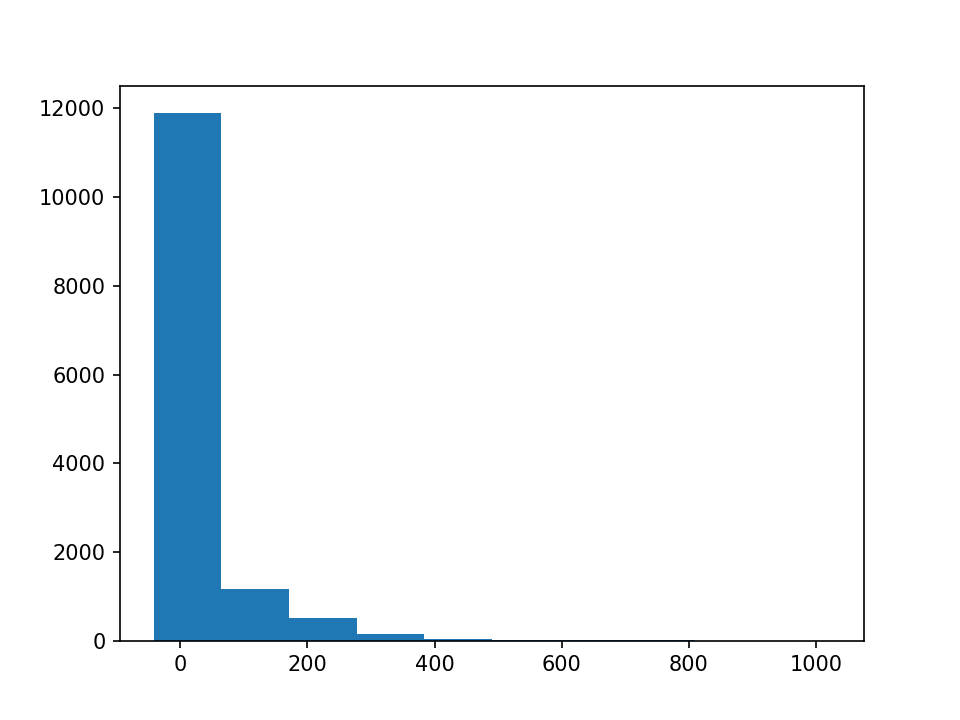

(array([1.1901e+04, 1.1740e+03, 5.2300e+02, 1.6200e+02, 3.1000e+01,
        8.0000e+00, 7.0000e+00, 8.0000e+00, 4.0000e+00, 6.0000e+00]),
 array([ -41.66550827,   64.72856903,  171.12265015,  277.51672363,
         383.91079712,  490.30487061,  596.69897461,  703.09301758,
         809.48712158,  915.88116455, 1022.27526855]),
 <BarContainer object of 10 artists>)

In [84]:
plt.figure()
plt.hist(new_vars[n][0,:,:].flatten())

In [30]:
new_lon.shape,new_lat.shape

NameError: name 'new_lon' is not defined

In [31]:
iarg1 = np.argmin((xm-ilon1)**2+(ym-ilat1)**2)
iarg2 = np.argmin((xm-ilon2)**2+(ym-ilat2)**2)
new_vars[n][0,:,:].flatten()[iarg1],new_vars[n][0,:,:].flatten()[iarg2]

NameError: name 'xm' is not defined

In [36]:
new_vars[n][0,:,:]

masked_array(
  data=[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

## Run new regridding

In [28]:
from scipy.interpolate import RectSphereBivariateSpline, SmoothSphereBivariateSpline

In [ ]:
def upscale_field(lons, lats, field, x_scale=2, y_scale=2, is_degrees=True):
    '''
    Takes a field defined on a sphere using lons/lats and returns an upscaled
    version, using cubic spline interpolation.
    '''
    if is_degrees:
        lons = lons * np.pi / 180.
        lats = (90.0-lats) * np.pi / 180.

    d_lon = lons[1] - lons[0]
    d_lat = lats[1] - lats[0]

    new_lon = np.linspace(lons[0], lons[-1], len(lons) * x_scale)
    new_lat = np.linspace(lats[0], lats[-1], len(lats) * x_scale)

    mesh_new_lat, mesh_new_lon = np.meshgrid(new_lat, new_lon)

    if True:
        lut = RectSphereBivariateSpline(lats[1:-1], lons[1:-1], field[1:-1,
                                                                      1:-1])

        interp_field = lut.ev(mesh_new_lat[1:-1, 1:-1].ravel(),
                              mesh_new_lon[1:-1, 1:-1].ravel()).reshape(
                                  mesh_new_lon.shape[0] - 2,
                                  mesh_new_lon.shape[1] - 2).T
    else:
        pass
    
    if is_degrees:
        new_lat = 90-(new_lat*180/np.pi)
        new_lon = new_lon*180/np.pi
    
    return new_lon[1:-1], new_lat[1:-1], interp_field

In [35]:
vars[n][it,:,:].T.shape

(384, 432)

In [43]:
lats = (90.0-lat_var[::-1])*np.pi/180.0
lons = (180+lon_var)*np.pi/180.0

lut = SmoothSphereBivariateSpline(lats.ravel()[:500],lons.ravel()[:500],vars[n][it,:,:].T[::-1,:].ravel()[:500],s=300)

In [48]:
mesh_new_lat, mesh_new_lon = np.meshgrid((90.0-new_lat)*np.pi/180.0,(180+new_lon)*np.pi/180.0)
vvn = lut.ev(mesh_new_lat,mesh_new_lon)

<IPython.core.display.Javascript object>


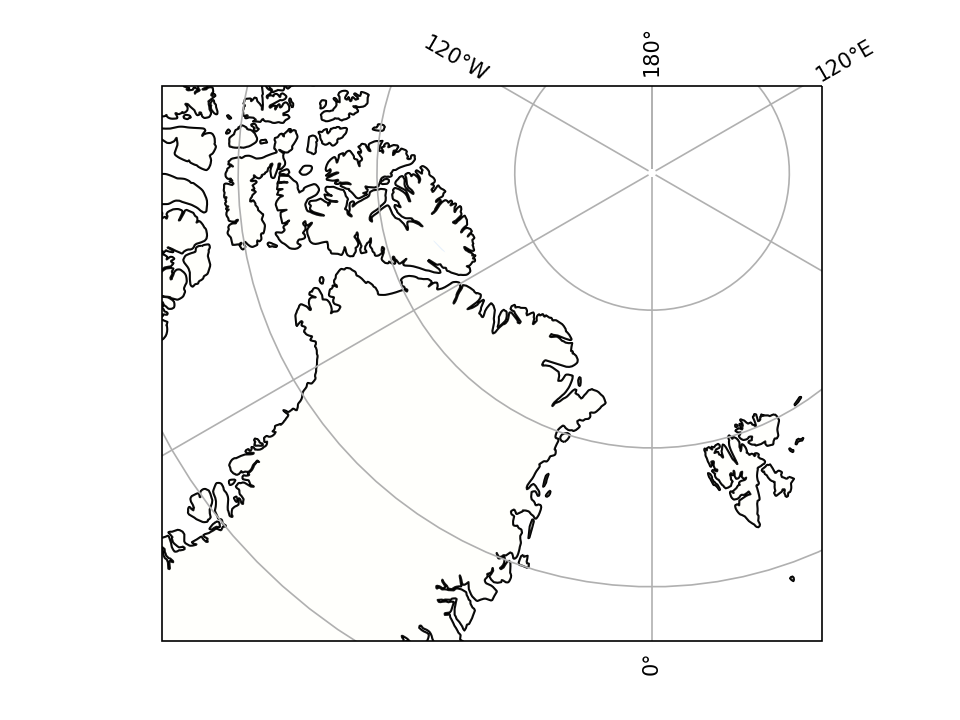

TypeError: Dimensions of C (384, 432) should be one smaller than X(384) and Y(432) while using shading='flat' see help(pcolormesh)

In [62]:
fig,ax = make_map()
cf = ax.pcolormesh(new_lon,new_lat,vvn,cmap=plt.cm.summer_r,transform=tr,shading='nearest',vmin=-10,vmax=500)
plt.title('RASM_ESRL - Cloud liquid water path - 2023-11-15 - SmoothSphereBivariateSpline')
plt.colorbar(cf)

In [34]:
new_lons2,new_lats2,lwp2 = upscale_field(new_lat[::50][::-1],new_lon[::50],vars[n][it,::50,::50].T[::-1,:],x_scale=1,y_scale=1)

ValueError: u must be strictly increasing

In [38]:
xm,ym = np.meshgrid(new_lons2,new_lats2)
iarg1 = np.argmin((xm-ilon1)**2+(ym-ilat1)**2)
iarg2 = np.argmin((xm-ilon2)**2+(ym-ilat2)**2)
lwp2.flatten()[iarg1],lwp2.flatten()[iarg2]

In [39]:
new_lon.shape,lwp2.shape

In [1]:
fig,ax = make_map()
cf = ax.pcolormesh(new_lons2,new_lats2,lwp2[::-1,:],cmap=plt.cm.summer_r,transform=tr,vmin=-10,vmax=500)
plt.title('RASM_ESRL - Cloud liquid water path - 2023-11-15 - RectSphereBivariateSpline')
plt.colorbar(cf)

NameError: name 'make_map' is not defined